# Script for Extraction/Processing and Preparation for MaxEnt

### First the extraction of the data from the PPM files

In [4]:
import numpy as np 
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
files_ppms = ['out_{}.pdb'.format(i) for i in range(0,10000)]

In [18]:
files[9999]

'out_9999.pdb'

In [69]:
################## LOADING THE FILES ############################

# Path of the ppm files 

############## FOR 16Q ###############
# pathppms = '/home/pedro/calculs/busra/16data/'
# pathexp = '/home/pedro/calculs/busra/16data/'
# files_ppms = ['/home/pedro/calculs/busra/16data/out_{}.pdb.ppm'.format(i) for i in range(0,10000)]
# files_pdb = ['/home/pedro/calculs/busra/16data/out_{}.pdb'.format(i) for i in range(0,10000)]

############# FOR 12Q #################
# pathppms = '../reweighting/12q/pdbs/'
# pathexp = '../reweighting/12q/'
# files_ppms = ['../reweighting/12q/pdbs/out_{}.pdb.ppm'.format(i) for i in range(0,10000)]
# files_pdb = ['../reweighting/12q/pdbs/out_{}.pdb'.format(i) for i in range(0,10000)]

############## FOR 8Q ##################
# pathppms = '../reweighting/8q/pdbs/'
# pathexp = '../reweighting/8q/'
# files_ppms = ['../reweighting/8q/pdbs/out_{}.pdb.ppm'.format(i) for i in range(0,10000)]
# files_pdb = ['../reweighting/8q/pdbs/out_{}.pdb'.format(i) for i in range(0,10000)]

############# FOR 4Q ##################
# pathppms = '../reweighting/4q/pdbs/'
pathexp = '../reweighting/4q/'
files_ppms = ['../reweighting/4q/pdbs/out_{}.pdb.ppm'.format(i) for i in range(0,10000)]
files_pdb = ['../reweighting/4q/pdbs/out_{}.pdb'.format(i) for i in range(0,10000)]

####################### FILELIST ################################


# filelist = pathppms+files_ppms
# filelist.sort()

############################ Checking ###########################
# print("Number of files =", len(filelist))
# print("Path = ",filelist[0])
# if len(filelist) == 10000:
#     print("Selection Successfull, filelist has 10k files")
# else:
#     print("Error")

In [71]:
files_ppms

['../reweighting/4q/pdbs/out_0.pdb.ppm',
 '../reweighting/4q/pdbs/out_1.pdb.ppm',
 '../reweighting/4q/pdbs/out_2.pdb.ppm',
 '../reweighting/4q/pdbs/out_3.pdb.ppm',
 '../reweighting/4q/pdbs/out_4.pdb.ppm',
 '../reweighting/4q/pdbs/out_5.pdb.ppm',
 '../reweighting/4q/pdbs/out_6.pdb.ppm',
 '../reweighting/4q/pdbs/out_7.pdb.ppm',
 '../reweighting/4q/pdbs/out_8.pdb.ppm',
 '../reweighting/4q/pdbs/out_9.pdb.ppm',
 '../reweighting/4q/pdbs/out_10.pdb.ppm',
 '../reweighting/4q/pdbs/out_11.pdb.ppm',
 '../reweighting/4q/pdbs/out_12.pdb.ppm',
 '../reweighting/4q/pdbs/out_13.pdb.ppm',
 '../reweighting/4q/pdbs/out_14.pdb.ppm',
 '../reweighting/4q/pdbs/out_15.pdb.ppm',
 '../reweighting/4q/pdbs/out_16.pdb.ppm',
 '../reweighting/4q/pdbs/out_17.pdb.ppm',
 '../reweighting/4q/pdbs/out_18.pdb.ppm',
 '../reweighting/4q/pdbs/out_19.pdb.ppm',
 '../reweighting/4q/pdbs/out_20.pdb.ppm',
 '../reweighting/4q/pdbs/out_21.pdb.ppm',
 '../reweighting/4q/pdbs/out_22.pdb.ppm',
 '../reweighting/4q/pdbs/out_23.pdb.ppm',
 '

In [72]:
############ EXTRACING THE VALUES (GENFROMTXT) ##############


############## FOR 12Q and 16Q #####################
# shifts_calc = []

# for name in filelist:
#     data = np.genfromtxt(name, 
#                     usecols=(5,8,11,14,17,21), 
#                     delimiter=(6,2,5,3,1,7,1,7,8,8,1,7,1,7,8,8,1,7,1,7,1,7,1,7),
#                     skip_header=1,
#                    missing_values='999.000,-999.000', usemask=True)
#     data = data.filled(np.nan)
#     shifts_calc.append(data)
    
# if np.array(shifts_calc).shape == (10000,20,6):
#     print("Extraction has been succesfull")
# else:
#     print("Error")


################# FOR 8 Q ####################

shifts_calc = []

for name in files_ppms:
    data = np.genfromtxt(name, 
                    usecols=(5,8,11,14,17,21), 
                    delimiter=(6,2,5,3,1,7,1,7,8,8,1,7,1,7,8,8,1,7,1,7,1,7,1,7),
                    skip_header=1,
                   missing_values='999.000,-999.000', usemask=True)
    data = data.filled(np.nan)
    shifts_calc.append(data)
    
if np.array(shifts_calc).shape == (10000,16,6):
    print("Extraction has been succesfull")
else:
    print("Error")

Extraction has been succesfull


In [73]:
###################### CONVERTING TO ARRAY ########################

shifts_calc = np.array(shifts_calc)

print(shifts_calc.shape)
print(shifts_calc[0,0].shape)


(10000, 16, 6)
(6,)


### Extraction from the Experimental Chemical Shifts 

In [74]:
################# LOADING THE EXP CHEMICAL SHIFTS ##################
shifts = {}
for key in ['CA', 'CB', 'C',]:
    filename = pathexp+key+'shifts.dat' # CHANGE THE PATH EACH TIME
    data = np.genfromtxt(filename, usecols=(1),missing_values='0.0',usemask=True)
    data = data.filled(np.nan)
    data = np.array(data)
    shifts[key] = data
shifts

{'CA': array([     nan,      nan,      nan,      nan,      nan, 58.74703,
        56.0724 , 55.88152, 55.83973, 55.87823, 56.52391, 56.29909,
        56.07039, 55.85014,      nan,      nan]),
 'CB': array([     nan,      nan,      nan,      nan,      nan, 63.36192,
        41.87189, 41.86799, 41.91361, 42.05869, 28.97372, 29.19332,
        29.38276, 29.39399,      nan,      nan]),
 'C': array([   nan,    nan,    nan,    nan,    nan, 175.2 , 177.88, 177.87,
        178.01, 178.17, 176.77, 176.46, 176.14, 175.82,    nan,    nan])}

### Processing of the ppm Chemical Shifts according to the exp

In [75]:
######################### EXP VS PPM #########################
 
# Putting NaN in the ppm where the EXPs are    

for name,calc in zip(shifts,shifts_calc.T):
    calc[np.isnan(shifts[name]),:] = np.nan
    shifts[name] = shifts[name][~np.isnan(shifts[name])]

In [76]:
q = shifts_calc.swapaxes(1,2)
q = q.reshape(q.shape[0], -1)
q_valid = q[:, np.isfinite(q[0])]
q_valid.shape

(10000, 61)

In [77]:
Q_exp = []

for key in shifts:
    Q_exp.append(shifts[key])

Q_exp = np.concatenate(Q_exp)

In [78]:
Q_exp.shape

(27,)

In [79]:
# np.save("../reweighting/16q/Q.npy", Q_exp)
# np.save("../reweighting/16q/q.npy", q_valid)

# np.save("../reweighting/12q/Q.npy", Q_exp)
# np.save("../reweighting/12q/q.npy", q_valid)

# np.save("../reweighting/8q/Q.npy", Q_exp)
# np.save("../reweighting/8q/q.npy", q_valid)

np.save("../reweighting/4q/Q.npy", Q_exp)
np.save("../reweighting/4q/q.npy", q_valid)



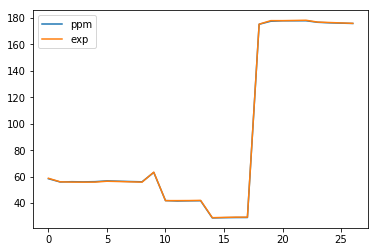

In [81]:
plt.plot(q_valid.mean(0)[:27], label="ppm")
plt.plot(Q_exp, label="exp")
plt.legend()